In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from filtering_visualization import data_visualization


### Specify hpyerparams
Number of source and target clusters is zero because we use mean_shift clustering.
Specify the dataset and the clustering method (or the folder where the cluster files are).

In [3]:
# identity DD: 72593, 71427
# identity PC: 129763, 133760
num_source_cl=0
num_target_cl=0
dataset="DailyDialog"
clustering_method="avg_word_embedding_no_stop"

### Visualize the clustering.
Graphs on the left are about source data, and on the right the target data.
* First the entropy of all the utterances in the dataset is plotted.
* Second each sentence's cluster's size is plotted (for all sentences in the dataset).
* Third the entropy and cluster size of all clusters is plotted
* Finally the relationship between the entropy of an utterance and the number of words in it is plotted.

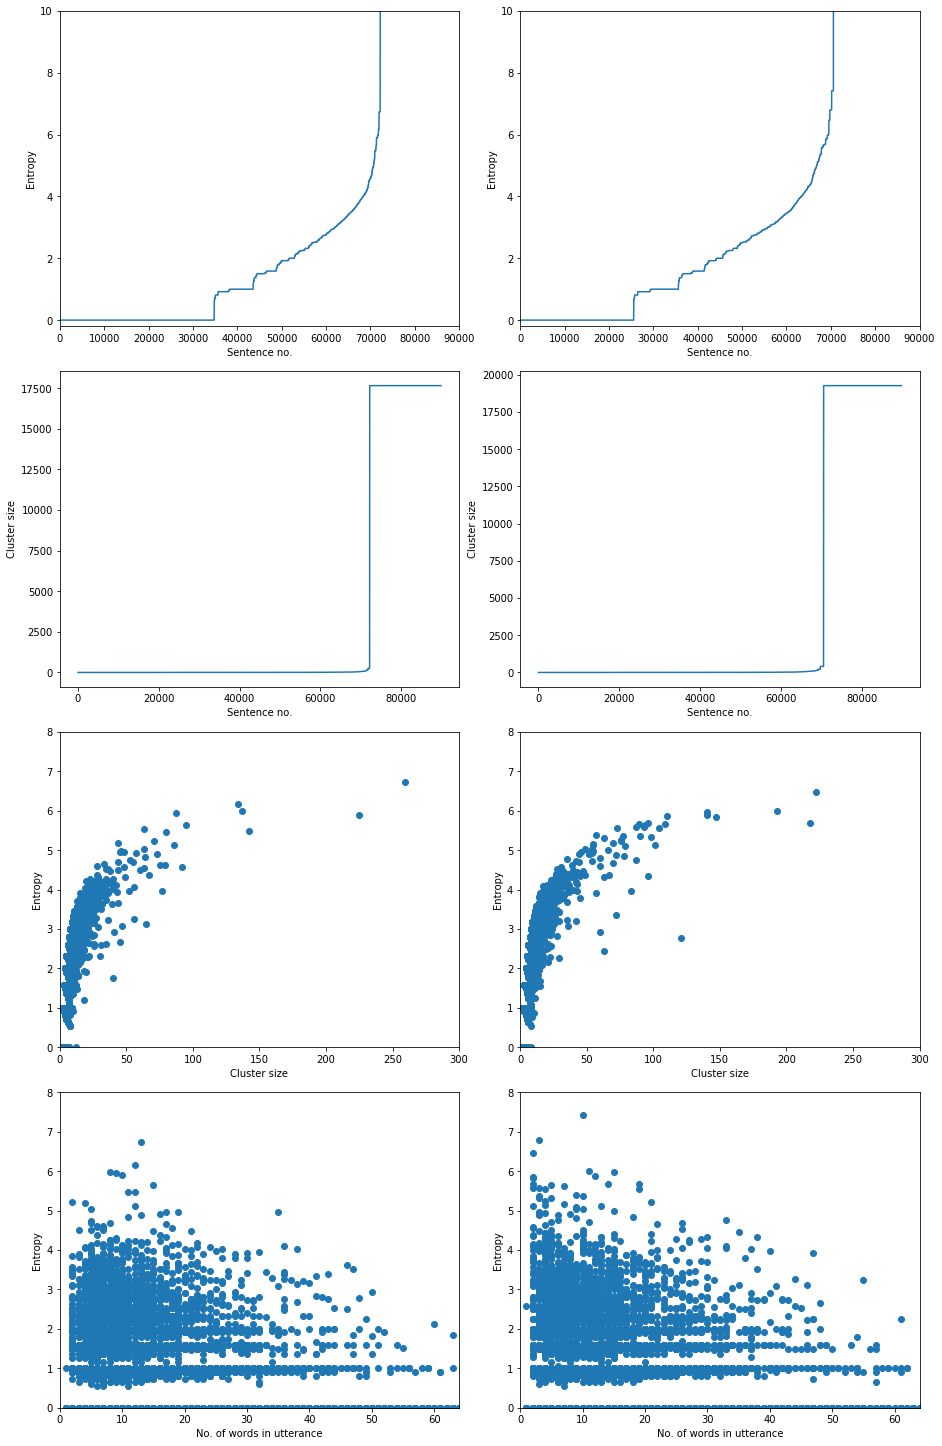

In [4]:
source_entropies, target_entropies, source_cl_sizes, target_cl_sizes = \
    data_visualization(num_source_cl, num_target_cl, dataset, clustering_method)

In [5]:
"""Not used currently.
# compare filtering based on cluster size and entropy
source_cl_sen=[scl[0] for scl in source_cl_sizes]
source_entropy_sen=[m[0] for m in source_entropies]
different=0
first_k=20000

for i, medoid in enumerate(source_entropies[:first_k]):
    if medoid[0] not in source_cl_sen[:first_k]:
        #print(medoid)
        different+=1
print(str(different)+": number of sentences which are different in the first "+str(first_k)
      +", ordered based on entropy and cluster size: ")

for i, medoid in enumerate(source_cl_sizes[:first_k]):
    if medoid[0] not in source_entropy_sen[:first_k]:
        print(medoid)
"""

'Not used currently.\n# compare filtering based on cluster size and entropy\nsource_cl_sen=[scl[0] for scl in source_cl_sizes]\nsource_entropy_sen=[m[0] for m in source_entropies]\ndifferent=0\nfirst_k=20000\n\nfor i, medoid in enumerate(source_entropies[:first_k]):\n    if medoid[0] not in source_cl_sen[:first_k]:\n        #print(medoid)\n        different+=1\nprint(str(different)+": number of sentences which are different in the first "+str(first_k)\n      +", ordered based on entropy and cluster size: ")\n\nfor i, medoid in enumerate(source_cl_sizes[:first_k]):\n    if medoid[0] not in source_entropy_sen[:first_k]:\n        print(medoid)\n'

### Print some clusters
Let's see the unique elements of the cluster's with highest entropy.

In [4]:
from filtering_visualization import print_clusters
print_clusters(num_source_cl, num_target_cl, clustering_method, tag='Source')

0.7882753555451693
Medoid: the kitchen stinks  . Entropy: 10.187637506790766
Size: 17664
Medoid: do you mind if we switch over  ? Entropy: 5.98632578716637
Size: 137
Elements: 
that 's no problem  .
what was your problem  ?
what 's his problem  ?
no problem  that 'll be  5 . 48  .
no problem  .  i 'll do that for you  .
i can solve it  thanks  .
i have no problem with that  .
if it 's a problem  you do n't have to do it for me  .
it 's no problem  .
what problem are you having  ?
what 's your problem then  ?
may  could you tell me how to solve this problem  ?
no problem  .  but how  ?
what is the problem  ?
why  ?  what 's the problem  ?
no problem  .  here you are  .
so  what 's the problem  ?
what was the problem  ?
not a problem  .
what problem  ?
no problem  .
no problem  .  so how have you been  ?
so what 's the problem  ?
how will you solve the problem  ?
will you be able to solve my problem  ?
that 'll be no problem  .
that wo n't be a problem  .
is there a problem with it  ?
wh

In [5]:
index = 0

print('Medoid: {}' list(source)[0], source[list(source)[0]])

SyntaxError: invalid syntax (<ipython-input-5-7b33414d52f8>, line 3)